<a href="https://colab.research.google.com/github/NjokiMbugua/Hypothyroid-symptoms-predictions/blob/main/DSC9_Independent_Project_Week_8_Njoki_Mbugua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Defining the question

## a.Specific Question

Build a model for Nairobi Hospital that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b.Defining Metrics for success

Create various models and determine the most appropriate and accurate one that will be used in the patients symptoms predictions.

## c.Understanding the context

Performing a background search to understand the data in order to be a ble to draw a concrete data analysis plan.

## d.Recording the experimental design

Data cleaning

Univariate analysis

Bivariate analysis

Random forest classifier

Ada boosted trees

Gradient boosted trees

Support Vector Machine(SVM)

## e.Data Relevance

Data will be cross-checked to ensure it is relevant to the topic of study and adequate enough to answer the research question.

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data

In [3]:
# loading the dataset
# url= http://bit.ly/hypothyroid_data
hypothyroid = pd.read_csv('/content/hypothyroid.csv')
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# Checking the dataset

In [4]:
# Shape
hypothyroid.shape

(3163, 26)

In [5]:
# getting information about the datatypes
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [6]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [7]:
# getting summary statistics on the dataset
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


Tidying the data

In [8]:
# # checking for duplicates
hypothyroid.duplicated().sum()

77

In [9]:
# Dropping the duplicates
hypothyroid.drop_duplicates(keep='first', inplace = True)

In [10]:
# checking for unique values in each column using a for loop

for column in hypothyroid.columns:           
  print(column)                                
  print(hypothyroid[column].unique())        
  print(hypothyroid[column].nunique())       
  print('\n')      

status
['hypothyroid' 'negative']
2


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93


sex
['M' 'F' '?']
3


on_thyroxine
['f' 't']
2


query_on_thyroxine
['f' 't']
2


on_antithyroid_medication
['f' 't']
2


thyroid_surgery
['f' 't']
2


query_hypothyroid
['f' 't']
2


query_hyperthyroid
['f' 't']
2


pregnant
['f' 't']
2


sick
['f' 't']
2


tumor
['f' 't']
2


lithium
['f' 't']
2


goitre
['f' 't']
2


TSH_measured
['y' 'n']
2


TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '5

Some columns (TBG, FTI,TT4,T3) has '?'. We replace the '?' with nan.

In [11]:
# Some columns (TBG, FTI,TT4,T3) has '?'
# Replacing the '?' with nan
hypothyroid.replace('?', np.nan, inplace=True)

In [12]:
# changing the column datatypes to their appropriate data
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
                       

# Using a for loop to change columns to their appriopriate datatypes
#
for column in hypothyroid.columns:
  if column in numerical_columns:
   hypothyroid[column] = hypothyroid[column].astype('float')
  else:
    hypothyroid[column] = hypothyroid[column].astype('category') 
    

In [13]:
# Confirming data types changes
hypothyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [14]:
# Checking for missing values
hypothyroid.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [15]:
# fill missing values with mean column values
hypothyroid.fillna(hypothyroid.mean(), inplace=True)

In [16]:
# Replace missing values in the sex column with the mode
hypothyroid.sex.fillna(hypothyroid.sex.mode()[0], inplace = True)

In [17]:
# Confirming if missing values have been filled up
#
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [18]:
hypothyroid.head(0)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG


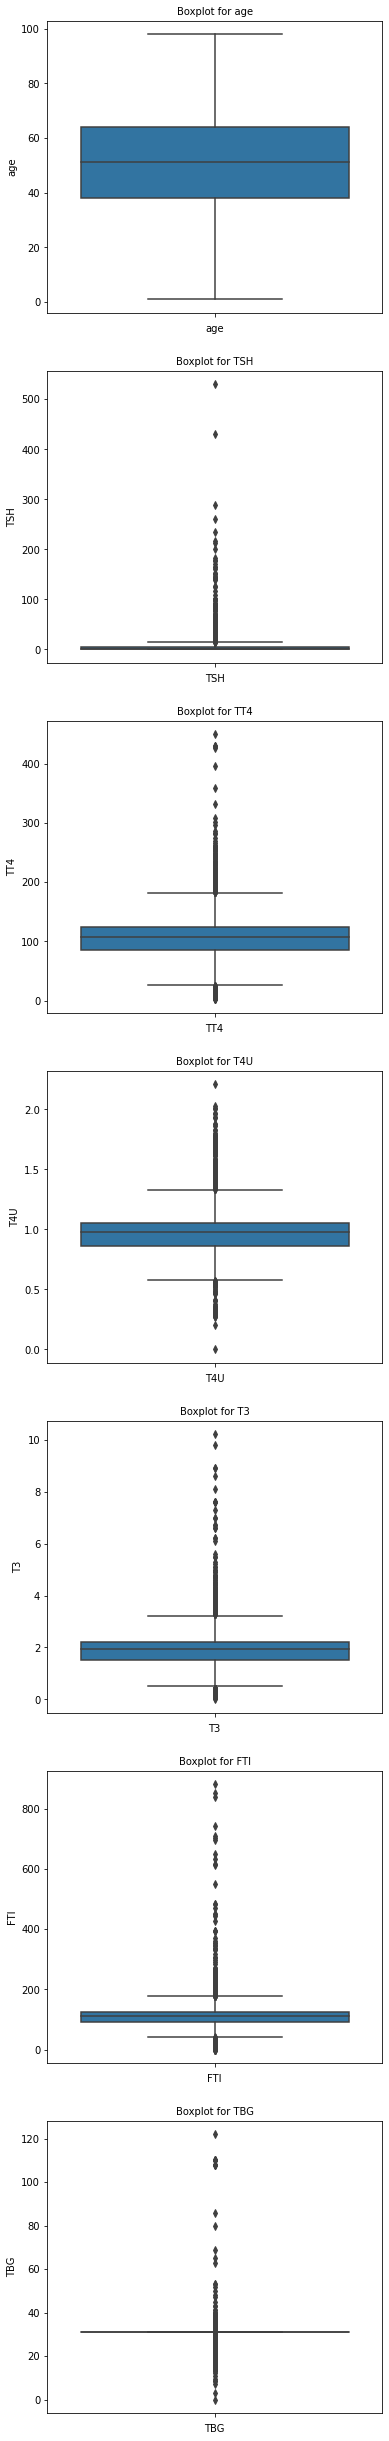

In [19]:
# Checking for outliers for numeric variables
cols =cols = ['age', 'TSH', 'TT4', 'T4U', 'T3', 'FTI', 'TBG']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
        
    sns.boxplot(y=hypothyroid[col_val], ax=axs[i])
    axs[i].set_title('Boxplot for '+col_val, fontsize=10)
    axs[i].set_xlabel(col_val, fontsize=10)

# Univariate analysis

In [20]:
hypothyroid.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.07012


Text(0, 0.5, 'Count')

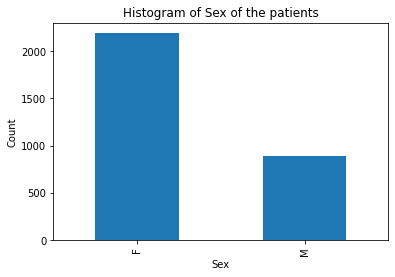

In [21]:
# Histogram showing sex of the patients
hypothyroid['sex'].value_counts().plot(kind='bar')
plt.title('Histogram of Sex of the patients')
plt.xlabel('Sex')
plt.ylabel('Count')

Most of the patients recorded were females.

(array([  6.,   8.,  42., 104., 133., 210., 156., 172., 176., 152., 641.,
        268., 263., 167., 247., 183.,  84.,  66.,   6.,   2.]),
 array([ 1.  ,  5.85, 10.7 , 15.55, 20.4 , 25.25, 30.1 , 34.95, 39.8 ,
        44.65, 49.5 , 54.35, 59.2 , 64.05, 68.9 , 73.75, 78.6 , 83.45,
        88.3 , 93.15, 98.  ]),
 <a list of 20 Patch objects>)

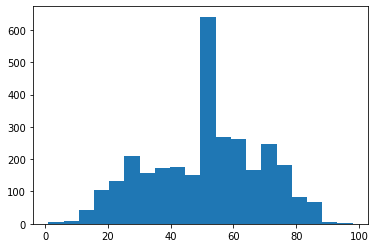

In [85]:
# Histogram showing age distribution of the patients
plt.hist(hypothyroid['age'],bins=20)

A high number of patients were between the ages of 40 to 60 years.

Text(0, 0.5, 'Count')

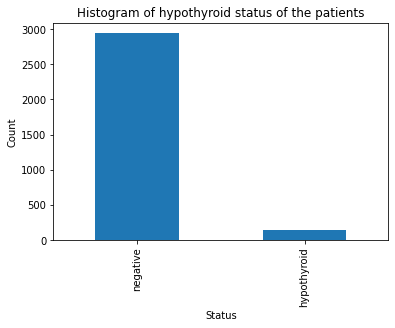

In [89]:
# Histogram showing hypothyroid status of the patients
hypothyroid['status'].value_counts().plot(kind='bar')
plt.title('Histogram of hypothyroid status of the patients')
plt.xlabel('Status')
plt.ylabel('Count')

Majority of the patients tested negative for hypothyroid

# Bivariate analysis

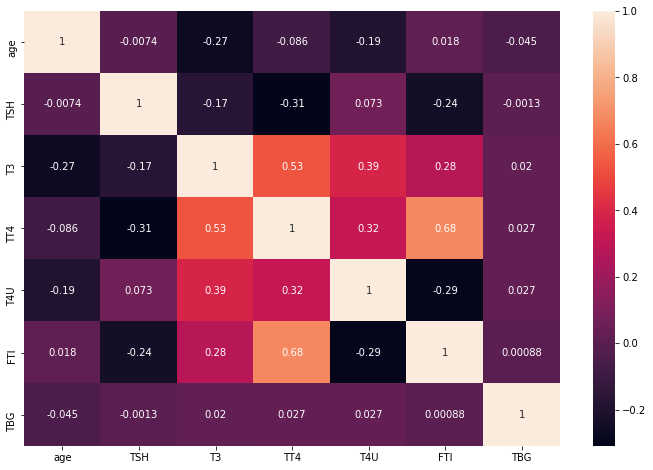

In [90]:
# Heatmap showing correlation of variables
plt.figure(figsize=(12, 8))

corr = hypothyroid.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

There is high collinearity observed between FTI and TT4

In [23]:
hypothyroid.head(0)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG


# Decision Trees

## Random Forest

In [24]:
# Importing the relevant libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
# Split the independent and dependent variables
X = hypothyroid.drop('status', axis=1)
y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)


In [26]:
# Encoding the categorical variables
X = pd.get_dummies(X)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [28]:
# Instantiating the model

forest = RandomForestClassifier(n_estimators = 300, random_state = 20,min_samples_split = 10, max_depth=5)
forest = forest.fit(X_train, y_train)

In [29]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)

In [30]:
#
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.033981,0.024272
std,0.181326,0.154017
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [75]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [91]:
# Evaluating the model
print(confusion_matrix(y_test,y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

[[885   3]
 [ 15  23]]


0.980561555075594


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       597
           1       1.00      0.71      0.83        21

    accuracy                           0.99       618
   macro avg       1.00      0.86      0.91       618
weighted avg       0.99      0.99      0.99       618



The model achieved an accuracy of 98% thus it is fairly good for the predictions.

The model used inbuilt random forest classifier hyperparameters (n_estimators = 300, random_state = 20,min_samples_split = 10, max_depth=5)

In [34]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.009708737864077669
Mean Squared Error: 0.009708737864077669
Root Mean Squared Error: 0.0985329278164293


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


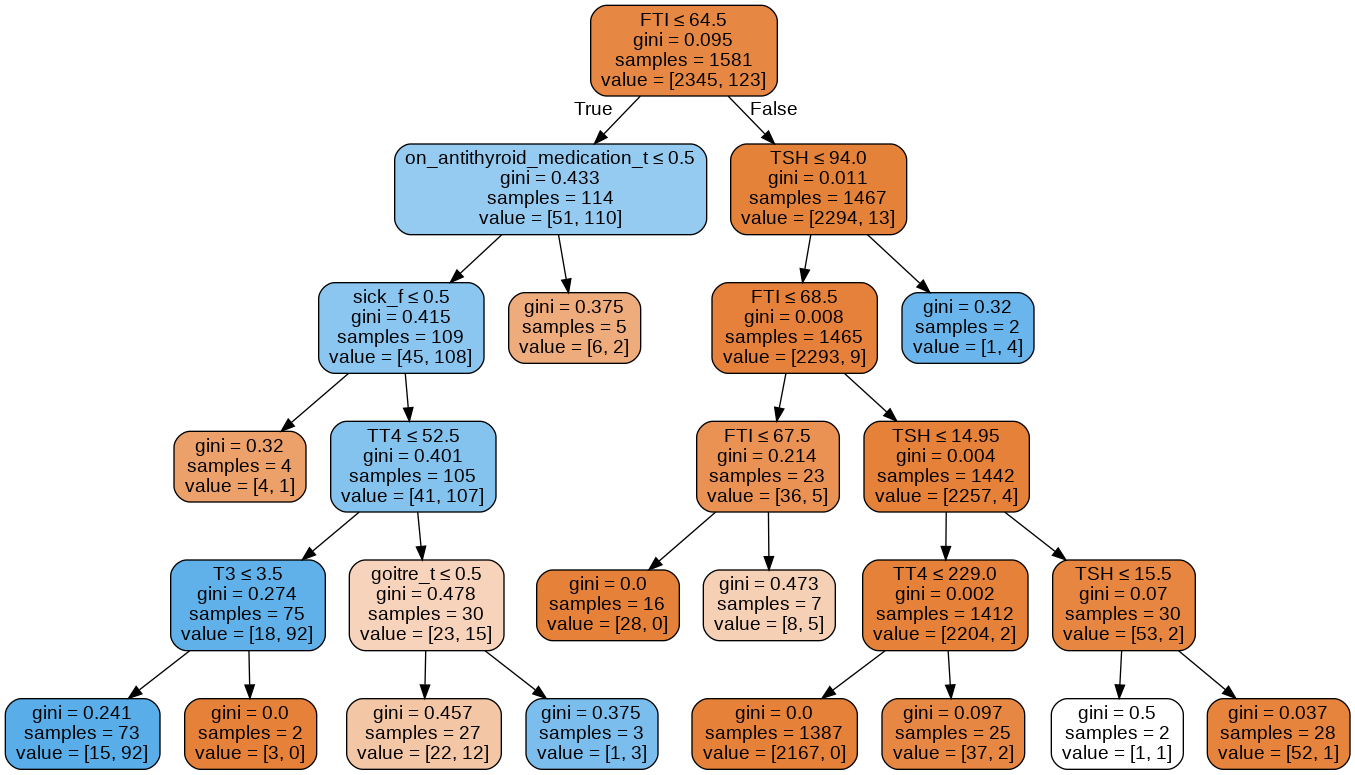

In [35]:
# Visualizing performance picking tree number 50
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; 

tree = forest.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid.png')
Image(graph.create_png())

In [58]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('TSH', 0.04), ('T3', 0.03), ('TT4', 0.07), ('T4U', 0.0), ('FTI', 0.83), ('TBG', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.02), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.02), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.01), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_n', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.0), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0)]

Variable

The four top most important features include 

*   FTI 
*   TT4

*   TSH 
*   T3





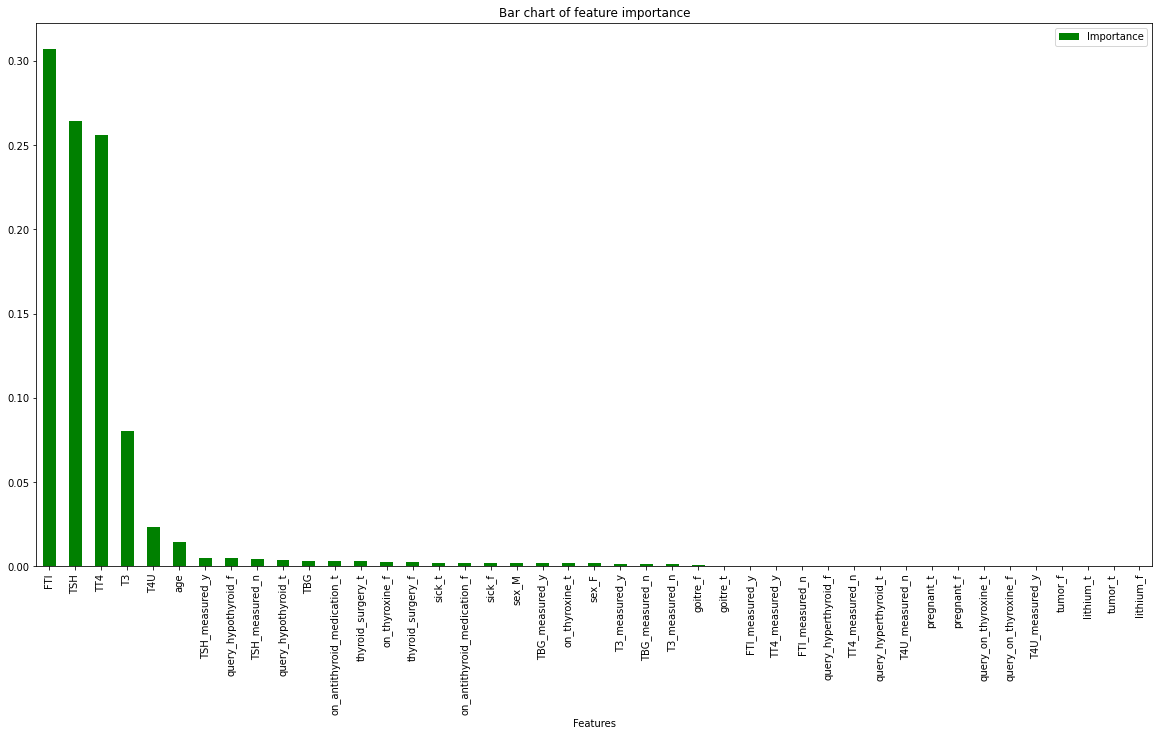

In [60]:
# Visualizing the feature of importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Bar chart of feature importance',figsize = (20, 10), color = 'green')
plt.show()


## Gradient Boosting

In [37]:
# Importing the relevant libraries

from sklearn.ensemble import GradientBoostingClassifier


In [38]:
# Split the independent and dependent variables
X = hypothyroid.drop('status', axis=1)
y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)

In [39]:
# Encoding the categorical variables
X = pd.get_dummies(X)

In [107]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

In [98]:
y_pred_gbc = gbc.predict(X_test)

In [100]:
print(confusion_matrix(y_test,y_pred_gbc))
print('\n')
print(classification_report(y_test,y_pred_gbc))


[[888   0]
 [ 38   0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       888
           1       0.00      0.00      0.00        38

    accuracy                           0.96       926
   macro avg       0.48      0.50      0.49       926
weighted avg       0.92      0.96      0.94       926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model achieved didnt read the positives status for hypothyroidsm

Remodelling using the two top most important features.

In [112]:
X = hypothyroid[['FTI', 'TT4','TSH','T3']].values
y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [114]:
target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

In [115]:
# getting the predictions
y_pred_gbc = gbc.predict(X_test)

In [116]:
# model evaluation
print(confusion_matrix(y_test,y_pred_gbc))
print('\n')
print(classification_report(y_test,y_pred_gbc))

[[592   0]
 [ 26   0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       592
           1       0.00      0.00      0.00        26

    accuracy                           0.96       618
   macro avg       0.48      0.50      0.49       618
weighted avg       0.92      0.96      0.94       618



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ada boost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [46]:
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

In [47]:
ada_boost = ada_boost.fit(X_train, y_train)

In [48]:
y_pred_ada = ada_boost.predict(X_test)

In [117]:
print(confusion_matrix(y_test,y_pred_ada))
print('\n')
print(classification_report(y_test,y_pred_ada))
print('\n')
print(accuracy_score(y_test,y_pred_ada))

[[577  15]
 [ 25   1]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       592
           1       0.06      0.04      0.05        26

    accuracy                           0.94       618
   macro avg       0.51      0.51      0.51       618
weighted avg       0.92      0.94      0.93       618



0.9352750809061489


The ada boosted trees model achieved an accuracy of 93.5% thus can be termed as a fairly good model to use for the predictions.

# Support Vector Machine(SVM)


The important feature from the random forest classifier are:

FTI 0.8264

TT4 0.0653

TSH 0.0428

T3 0.0251 

Will use these four features for the SVM predictions

In [62]:
# Call the SVC() model from sklearn and fit the model on the training data
from sklearn.svm import SVC
from sklearn.svm import SVC,LinearSVC

In [63]:
X = hypothyroid[['FTI', 'TT4','TSH','T3']].values
y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)

In [64]:
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.3, random_state=42)

Using the linear kernel

In [65]:
svc_model = SVC(kernel= 'linear')

In [66]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
# getting predictions from the model and creating a classification report and a confusion matrix
predictions = svc_model.predict(X_test)

In [120]:
# Model Evaluation
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[586   6]
 [  6  20]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.77      0.77      0.77        26

    accuracy                           0.98       618
   macro avg       0.88      0.88      0.88       618
weighted avg       0.98      0.98      0.98       618



0.9805825242718447


The model correctly predicted 606 out of the total 618 and achieved an accuracy of 98% thus it performed fairly well.

Using the polynomial kernel function

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
# Fitting the polynomial model

polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')

In [71]:
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

In [72]:
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [76]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

0.980561555075594


[[885   3]
 [ 15  23]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       888
           1       0.88      0.61      0.72        38

    accuracy                           0.98       926
   macro avg       0.93      0.80      0.85       926
weighted avg       0.98      0.98      0.98       926



Using radial basis kernel

In [78]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

In [79]:
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [81]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

0.980561555075594


[[885   3]
 [ 15  23]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       888
           1       0.88      0.61      0.72        38

    accuracy                           0.98       926
   macro avg       0.93      0.80      0.85       926
weighted avg       0.98      0.98      0.98       926



Comparatively all the models( Linear, poly, radial basis kernel) performed almost the same achieving an accuracy of 98%

# Conclusion and recommendations

From the analysis the Random forest classifier and the SVM both achieved an accuracy of 98% and thus both are equally good choices for the predictions.
The ada boost achieved an accuracy of 93% and is a close alternative.